## Data wrangling 

## Gathering Data
- In this section, we will gather the three required pieces of data.
- Download the file 'twitter_archive_enhanced.csv'
- Programmatically download the files using the Requests library from URL given in Project Details
- Query the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data in a file called tweet_json.txt file

## Assessing Data 
- In this section, we will assess the extracted data visually and programmatically for quality and tidiness issues.
- Detect and document at least eight (8) quality issues and two (2) tidiness issues 
- We follow the tidy principles as outlined in the link : https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html

In [2]:
# import packages
import pandas as pd
import numpy as np 
import tweepy
from tweepy import Cursor
import requests
import json
import os
import time
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

In [15]:
#Programmatically download data from Udacity url

#add url to variable, so that link can be easily changed at any point
tweet_image_pred_file = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

#read data into a file and save to dataframe
response = requests.get(tweet_image_pred_file)

with open('image_prediction.tsv',mode='wb')as file:
    file.write(response.content)
df_tsv=pd.read_csv('image_prediction.tsv',delimiter='\t')
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
#using pandas frunction from link below
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.extract.html
#For each subject string in the Series, extract groups from the first match of regular expression pattern
df_archive_csv=pd.read_csv('twitter-archive-enhanced.csv')
df_archive_csv.tweet_id=df_archive_csv.expanded_urls.str.extract('(\d{18})')

In [82]:
# add Twitter authorization values
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [19]:
#Function from docs at http://docs.tweepy.org/en/v3.6.0/api.html
api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(),wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

# Create list to store results
df_results = []
# Create list to ctach errors as observed
error_list = []

In [20]:
# extract tweet objects  using api methods
for tweet_id in twitter_Archive ['tweet_id']:
    try:
        page = api.get_status(tweet_id, tweet_mode = 'extended')
        
        
        favorites = page['favorite_count'] # How many favorites the tweet had
        retweets_count = page['retweet_count'] # Count of the retweet
        user_followers_count = page['user']['followers_count'] # How many followers the user had
        user_favourites_count = page['user']['favourites_count'] # How many favorites the user had
        date_timestamp = page['created_at'] # The date and time of the creation
        
        df_results.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets_count),
                        'user_followers_cnt': int(user_followers_count),
                        'user_favourites_cnt': int(user_favourites_count),
                        'date_timestamp': pd.to_datetime(date_timestamp)})
    
    # Catch the exceptions and print 
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        error_list.append(tweet_id)

#print("Number of items in result list", len(df_results))
#print("Number of errors", len(error_list))

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 607
Rate limit reached. Sleeping for: 608


In [21]:
# Create DataFrames from above data
df_json_tweets = pd.DataFrame(df_results, columns = ['tweet_id', 'favorites', 'retweets','user_followers_cnt', 'user_favourites_cnt', 'date_timestamp'])

# Save the dataFrame in file
df_json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)
#Add file contents to dataframe
df_json_tweets = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
#Inspect dataframe
df_json_tweets.head()

,tweet_id,favorites,retweets,user_followers_cnt,user_favourites_cnt,date_timestamp
0,892420643555336193,38984,8650,6430817,132887,2017-08-01 16:23:56
1,892177421306343426,33376,6355,6430817,132887,2017-08-01 00:17:27
2,891815181378084864,25149,4215,6430817,132887,2017-07-31 00:18:03
3,891689557279858688,42320,8764,6430817,132887,2017-07-30 15:58:51
4,891327558926688256,40488,9530,6430817,132887,2017-07-29 16:00:24


In [22]:
#Add dataframe values to csv
df_json_tweets.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [23]:
#Inspect the data frame
df_json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 6 columns):
tweet_id               2345 non-null int64
favorites              2345 non-null int64
retweets               2345 non-null int64
user_followers_cnt     2345 non-null int64
user_favourites_cnt    2345 non-null int64
date_timestamp         2345 non-null object
dtypes: int64(5), object(1)
memory usage: 110.0+ KB


#### Data wrangling Summary:
In the above sections, we have gathered the three pieces of data:
- Downloaded the file 'twitter_archive_enhanced.csv'
- Programmatically downloaded the files using the Requests library from URL given in Project Details
- Queried the Twitter API for each tweet's JSON data using Python's Tweepy library and stored each tweet's entire set of JSON data in a file called tweet_json.txt file

## Data Assessment
- Here, we assess the three different datasets visually and programmatically.
- We shall check for the five most common problems with messy datasets as per the link given in Resources:  https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html
- Column headers are values, not variable names.
- Multiple variables are stored in one column.
- Variables are stored in both rows and columns.
- Multiple types of observational units are stored in the same table.
- A single observational unit is stored in multiple tables.

In [24]:
# Assess the twitter archive
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

- we see here that there are 2356 records and 17 columns
- To be fixed: : in_reply_to_status_id and in_reply_to_user_id are float datatypes
- Remove retweet data
- timestamp datatype needs fixing

In [25]:
#checking statistical values in the twitter_Archive dataframe for the different variables
twitter_Archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [26]:
# check if any duplicates exist
twitter_Archive.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
2345    False
2346    False
2347    False
2348    False
2349    False
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

In [27]:
# get header row from dataframe to see if it contains column names or values
list(twitter_Archive.columns.values)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [28]:
#now we will inspect the dataframe to inspect what the values look like
twitter_Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- Nulls present in the variables 'doggo', 'floofer', 'pupper','puppo'
- They are stored as None in the dataframe
- When ratings are fractional, values are incorrectly loaded into numerator column. (as pointed out in review)

In [29]:
# we do the same for the remaining two sets of data
#First for the prediction tsv file
df_tsv.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [30]:
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [31]:
df_tsv.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Length: 2075, dtype: bool

In [32]:
list(df_tsv.columns.values)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog']

In [33]:
# Next for the dataframe with data from api
df_json_tweets.head()

,tweet_id,favorites,retweets,user_followers_cnt,user_favourites_cnt,date_timestamp
0,892420643555336193,38984,8650,6430817,132887,2017-08-01 16:23:56
1,892177421306343426,33376,6355,6430817,132887,2017-08-01 00:17:27
2,891815181378084864,25149,4215,6430817,132887,2017-07-31 00:18:03
3,891689557279858688,42320,8764,6430817,132887,2017-07-30 15:58:51
4,891327558926688256,40488,9530,6430817,132887,2017-07-29 16:00:24


In [34]:
df_json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 6 columns):
tweet_id               2345 non-null int64
favorites              2345 non-null int64
retweets               2345 non-null int64
user_followers_cnt     2345 non-null int64
user_favourites_cnt    2345 non-null int64
date_timestamp         2345 non-null object
dtypes: int64(5), object(1)
memory usage: 110.0+ KB


In [35]:
df_json_tweets.duplicated()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2315    False
2316    False
2317    False
2318    False
2319    False
2320    False
2321    False
2322    False
2323    False
2324    False
2325    False
2326    False
2327    False
2328    False
2329    False
2330    False
2331    False
2332    False
2333    False
2334    False
2335    False
2336    False
2337    False
2338    False
2339    False
2340    False
2341    False
2342    False
2343    False
2344    False
Length: 2345, dtype: bool

In [36]:
list(df_json_tweets.columns.values)

['tweet_id',
 'favorites',
 'retweets',
 'user_followers_cnt',
 'user_favourites_cnt',
 'date_timestamp']

#### Data Assessment Summary: 
- We find that headers are column names. So, we need not rename
- Duplicates do not seem to be present, but as the displayed values are a fraction of total, we can use the drop_duplicate function just in case.


##### Quality Issues:
- Remove retweet data records
- So, exclude the columns relevant to retweet records
- timestamp datatype needs fixing
- To be fixed: : in_reply_to_status_id and in_reply_to_user_id are float datatypes
- As alerted in review, when ratings are fractional, values are incorrectly loaded into numerator column. This needs to be corrected.


##### Tidyness Issues:
- Retweet data is not useful. Hence, eliminate 
- Nulls present in the variables 'doggo', 'floofer', 'pupper','puppo'as None. Need to alter
- Club data from rating_numerator and denominator as one variable rating
- Convert tweet_id to string datatype
- Convert rating values to float datatypes
- Join the three datasets to one
- Convert the timestamp into date and time columns

## Cleaning Data 

In [37]:
# Create copies of the dataframes prior to cleaning.
df_tsv_clean = df_tsv.copy()
df_archive_csv_clean = df_archive_csv.copy()
df_json_tweets_clean = df_json_tweets.copy()

In [30]:
# Cleaning Data 
#We shall first drop the duplicate values , if any
df_tsv.drop_duplicates()
df_archive_csv.drop_duplicates()
df_json_tweets.drop_duplicates()

,tweet_id,favorites,retweets,user_followers_cnt,user_favourites_cnt,date_timestamp
0,892420643555336193,38984,8651,6424307,132890,2017-08-01 16:23:56
1,892177421306343426,33383,6355,6424307,132890,2017-08-01 00:17:27
2,891815181378084864,25156,4215,6424307,132890,2017-07-31 00:18:03
3,891689557279858688,42331,8764,6424307,132890,2017-07-30 15:58:51
4,891327558926688256,40495,9529,6424307,132890,2017-07-29 16:00:24
5,891087950875897856,20310,3159,6424307,132890,2017-07-29 00:08:17
6,890971913173991426,11911,2104,6424307,132890,2017-07-28 16:27:12
7,890729181411237888,65865,19170,6424307,132890,2017-07-28 00:22:40
8,890609185150312448,27893,4321,6424307,132890,2017-07-27 16:25:51
9,890240255349198849,32085,7528,6424307,132890,2017-07-26 15:59:51


##### Fractional Rating Manual Correction
- For the fractional rating issue, manually change the rating.
- By manual inspection using the Find function on Excel, I ascertained the records with fractional ratings.
- The find string used was ".5/10". I manually set these numerators to rounded off values.

In [38]:
#drop retweet records
# we use drop function to remove the records with a valid retweet status id 
# we use inplace attribute to drop the records
twitter_Archive.drop(twitter_Archive[twitter_Archive['retweeted_status_id'].notnull()== True].index,inplace=True)
twitter_Archive.info()
#as seen here, our number of records reduced

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [39]:
# drop columns related to retweets
twitter_Archive.drop(['retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp'], axis=1,inplace=True)

In [40]:
# inspect the dataframe
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


In [41]:
# check timestamp datatype
type(twitter_Archive['timestamp'].iloc[0])


str

In [42]:
# convert to datetime datatype
twitter_Archive['timestamp'] = pd.to_datetime(twitter_Archive['timestamp'])
# check timestamp datatype
type(twitter_Archive['timestamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [43]:
# now extract as date and time separate columns 
twitter_Archive['date'] = twitter_Archive['timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
twitter_Archive['time'] = twitter_Archive['timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [44]:
# inspect the dataframe
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
date                     2175 non-null object
time                     2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(3), object(10)
memory usage: 288.9+ KB


In [45]:
#now drop redundant timestamp column
twitter_Archive.drop(['timestamp'], axis=1,inplace=True)
# inspect the dataframe
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
date                     2175 non-null object
time                     2175 non-null object
dtypes: float64(2), int64(3), object(10)
memory usage: 271.9+ KB


In [46]:
twitter_Archive.head(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,08-01-2017,16:23
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,08-01-2017,00:17
2,891815181378084864,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,07-31-2017,00:18
3,891689557279858688,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,07-30-2017,15:58
4,891327558926688256,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,07-29-2017,16:00
5,891087950875897856,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,07-29-2017,00:08
6,890971913173991426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,07-28-2017,16:27
7,890729181411237888,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,07-28-2017,00:22
8,890609185150312448,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,07-27-2017,16:25
9,890240255349198849,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,07-26-2017,15:59


In [47]:
#Club the doggo, floofer, puppo columns into one column as stage using lamda functions
#Using StackOverflow tips to concat the columns into a single one
# link is https://stackoverflow.com/questions/34670374/concat-two-columns-with-pandas
twitter_Archive['stage'] = twitter_Archive[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)


# convert the clubbed values to single values that make sense
# we do this using the replace function from pandas documnetation
# link is https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html
twitter_Archive['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
twitter_Archive['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
twitter_Archive['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
twitter_Archive['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
twitter_Archive['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

In [48]:
#now drop redundant 'doggo', floofer','pupper','puppo' columns
#twitter_Archive.drop(['doggo','floofer','pupper','puppo'], axis=1,inplace=True)
# inspect the dataframe
twitter_Archive.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 16 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
date                     2175 non-null object
time                     2175 non-null object
stage                    2175 non-null object
dtypes: float64(2), int64(3), object(11)
memory usage: 288.9+ KB


In [49]:
#club numerator and denominator rating as one value called rating
twitter_Archive['rating']=twitter_Archive.rating_numerator/twitter_Archive.rating_denominator
#drop unecessary columns of numerator and denominator
twitter_Archive=twitter_Archive.drop(['rating_numerator','rating_denominator'],axis=1)

In [50]:
#inspect dataframe
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
date                     2175 non-null object
time                     2175 non-null object
stage                    2175 non-null object
rating                   2175 non-null float64
dtypes: float64(3), int64(1), object(11)
memory usage: 271.9+ KB


In [51]:
# tweet_id, in_reply_to_status_id and in_reply_to_user_id are float datatypes. convert to string
twitter_Archive['in_reply_to_status_id'] = twitter_Archive['in_reply_to_status_id'].astype(str)
twitter_Archive['in_reply_to_user_id'] = twitter_Archive['in_reply_to_user_id'].astype(str)
twitter_Archive['tweet_id'] = twitter_Archive['tweet_id'].astype(str)

twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
date                     2175 non-null object
time                     2175 non-null object
stage                    2175 non-null object
rating                   2175 non-null float64
dtypes: float64(1), object(14)
memory usage: 271.9+ KB


In [52]:
# convert to datetime datatype
df_json_tweets['date_timestamp'] = pd.to_datetime(df_json_tweets['date_timestamp'])
# check timestamp datatype
type(df_json_tweets['date_timestamp'].iloc[0])

pandas._libs.tslib.Timestamp

In [53]:
# now extract as date and time separate columns 
df_json_tweets['date'] = df_json_tweets['date_timestamp'].apply(lambda time: time.strftime('%m-%d-%Y'))
df_json_tweets['time'] = df_json_tweets['date_timestamp'].apply(lambda time: time.strftime('%H:%M'))

In [54]:
#now drop redundant timestamp column
df_json_tweets.drop(['date_timestamp'], axis=1,inplace=True)
# inspect the dataframe
df_json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 7 columns):
tweet_id               2345 non-null int64
favorites              2345 non-null int64
retweets               2345 non-null int64
user_followers_cnt     2345 non-null int64
user_favourites_cnt    2345 non-null int64
date                   2345 non-null object
time                   2345 non-null object
dtypes: int64(5), object(2)
memory usage: 128.3+ KB


In [55]:
# convert tweet_id to string datatype
df_json_tweets['tweet_id'] = df_json_tweets['tweet_id'].astype(str)
df_json_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 7 columns):
tweet_id               2345 non-null object
favorites              2345 non-null int64
retweets               2345 non-null int64
user_followers_cnt     2345 non-null int64
user_favourites_cnt    2345 non-null int64
date                   2345 non-null object
time                   2345 non-null object
dtypes: int64(4), object(3)
memory usage: 128.3+ KB


In [56]:
#inspect dataframe
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [57]:
# convert tweet_id to string datatype
df_tsv['tweet_id'] = df_tsv['tweet_id'].astype(str)
df_tsv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [58]:
# Merge two dataframes together : twitter_Archive and df_tsv
# From documentation at link: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html
twitter_Archive=twitter_Archive.merge(df_tsv, left_on='tweet_id', right_on='tweet_id',how='left', left_index=True)
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2074 to 0
Data columns (total 26 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
date                     2175 non-null object
time                     2175 non-null object
stage                    2175 non-null object
rating                   2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog          

In [59]:
#step for dropping redundant cols after accidental double merge
#twitter_Archive.drop(['jpg_url_y','img_num_y','p1_y','p1_conf_y','p1_dog_y','p2_y','p2_conf_y','p2_dog_y','p3_y','p3_conf_y','p3_dog_y'], axis=1,inplace=True)

In [60]:
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 2074 to 0
Data columns (total 26 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
date                     2175 non-null object
time                     2175 non-null object
stage                    2175 non-null object
rating                   2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog          

In [61]:
##step for dropping redundant cols after accidental double merge
#twitter_Archive.rename(index=str, columns={"jpg_url_x": "jpg_url", "img_num_x": "img_num","p1_x":"p1","p2_x":"p2","p3_x":"p3","p1_conf_x":"p1_conf","p2_conf_x":"p2_conf","p3_conf_x":"p3_conf"},inplace=True)
#twitter_Archive.rename(index=str, columns={"p1_dog_x":"p1_dog","p2_dog_x":"p2_dog","p3_dog_x":"p3_dog"},inplace=True)

In [62]:
#merge the tweets data with the new merged data
twitter_Archive=twitter_Archive.merge(df_json_tweets, left_on='tweet_id', right_on='tweet_id',how='left', left_index=True)
twitter_Archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2344
Data columns (total 32 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    2175 non-null object
in_reply_to_user_id      2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
date_x                   2175 non-null object
time_x                   2175 non-null object
stage                    2175 non-null object
rating                   2175 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null float64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog          

In [63]:
#step for dropping redundant cols after accidental double merge
#twitter_Archive.drop(['date_y', 'time_y'], axis=1,inplace=True)

In [64]:
# as a final step, we shall drop the rows where there is null value for rating
twitter_Archive.dropna(subset = ['rating'])
#also, we shall remove records with extremley high value of rating, else we get max rating as infinites
twitter_Archive = twitter_Archive.drop(twitter_Archive[twitter_Archive.rating > 3].index)

In [70]:
#now store the cleaned up dataframes as csv files
twitter_Archive.to_csv('twitter_archive_master.csv', index=False)

## Data Analysis 
- Here, we will analyze the merged data


In [71]:
twitter_Archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,expanded_urls,name,doggo,floofer,pupper,...,p2_dog,p3,p3_conf,p3_dog,favorites,retweets,user_followers_cnt,user_favourites_cnt,date_y,time_y
0,892420643555336193,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,...,False,banana,0.076110,False,38984,8650,6430817,132887,08-01-2017,16:23
1,892177421306343426,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,...,True,papillon,0.068957,True,33376,6355,6430817,132887,08-01-2017,00:17
2,891815181378084864,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,...,True,kelpie,0.031379,True,25149,4215,6430817,132887,07-31-2017,00:18
3,891689557279858688,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,...,True,spatula,0.040836,False,42320,8764,6430817,132887,07-30-2017,15:58
4,891327558926688256,nan,nan,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,...,True,German_short-haired_pointer,0.175219,True,40488,9530,6430817,132887,07-29-2017,16:00


In [72]:
 twitter_merged_data = pd.read_csv('twitter_archive_master.csv') 

In [73]:
#we compute the statistics for numerical variables
twitter_merged_data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers_cnt,user_favourites_cnt
count,2.167000e+03,7.400000e+01,7.400000e+01,2167.000000,1990.000000,1990.000000,1.990000e+03,1.990000e+03,2167.000000,2167.000000,2.167000e+03,2167.000000
mean,7.368867e+17,7.400609e+17,2.123045e+16,1.062454,1.203518,0.594145,1.345215e-01,6.024879e-02,8737.564836,2725.156437,6.431110e+06,132887.010152
std,6.740389e+16,7.397888e+16,1.285751e+17,0.226435,0.561267,0.271909,1.007465e-01,5.092665e-02,12445.839282,4693.366575,2.045640e+02,0.100269
min,6.660209e+17,6.658147e+17,1.185634e+07,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,51.000000,0.000000,6.430815e+06,132887.000000
25%,6.768208e+17,6.755497e+17,1.294955e+09,1.000000,1.000000,0.362857,5.393988e-02,1.612658e-02,1876.500000,593.000000,6.430893e+06,132887.000000
50%,7.095192e+17,6.997653e+17,4.196984e+09,1.100000,1.000000,0.587797,1.175370e-01,4.947920e-02,3968.000000,1312.000000,6.431122e+06,132887.000000
75%,7.890232e+17,8.127522e+17,4.196984e+09,1.200000,1.000000,0.846285,1.953582e-01,9.159438e-02,10933.500000,3137.000000,6.431366e+06,132887.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,2.700000,4.000000,1.000000,4.880140e-01,2.734190e-01,144006.000000,77788.000000,6.431424e+06,132888.000000


## Data Visualization and Analysis


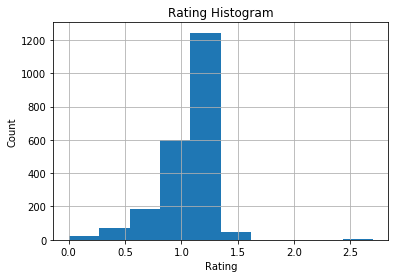

In [75]:
#We first create a histogram of ratings to see the popular range
twitter_merged_data.hist(column='rating');
plt.title('Rating Histogram')
plt.xlabel('Rating')
plt.ylabel('Count');

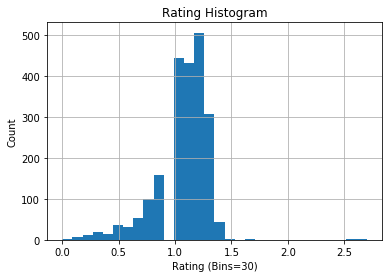

In [76]:
#We first create a histogram of ratings to see the popular range
twitter_merged_data.hist(column='rating', bins=30);
plt.title('Rating Histogram')
plt.xlabel('Rating (Bins=30)')
plt.ylabel('Count');

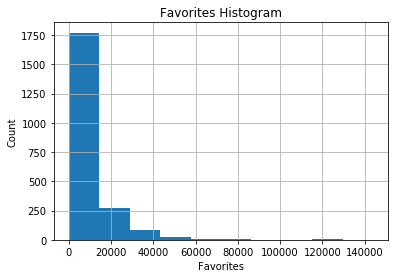

In [77]:
#We first create a histogram of ratings to see the popular range
twitter_merged_data.hist(column='favorites');
plt.title('Favorites Histogram')
plt.xlabel('Favorites')
plt.ylabel('Count');

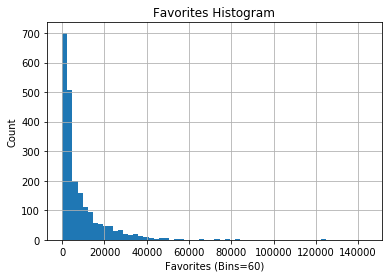

In [78]:
twitter_merged_data.hist(column='favorites', bins =60);
plt.title('Favorites Histogram')
plt.xlabel('Favorites (Bins=60)')
plt.ylabel('Count');

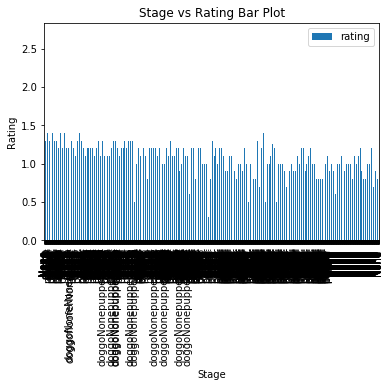

In [80]:
#Tried to see the stage and rating as adjacent bar plots
twitter_merged_data.plot('stage', 'rating', kind='bar');
plt.title('Stage vs Rating Bar Plot')
plt.xlabel('Stage')
plt.ylabel('Rating');

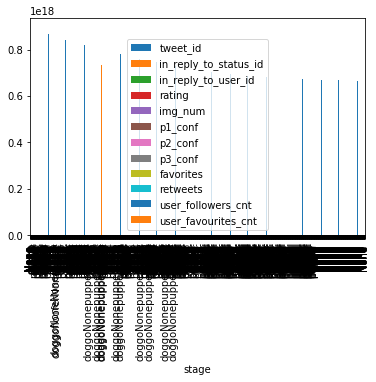

In [11]:
#Tried to view Bar plots of stages
twitter_merged_data.plot('stage',  kind='bar');
plt.title('Stage Bar')
plt.xlabel('Stage')
plt.ylabel('Rating');

In [81]:
twitter_merged_data.corr()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,rating,img_num,p1_conf,p2_conf,p3_conf,favorites,retweets,user_followers_cnt,user_favourites_cnt
tweet_id,1.000000,0.934891,0.152676,0.497136,0.213233,0.105410,-0.002111,-0.049196,0.615017,0.380378,-0.913175,0.008253
in_reply_to_status_id,0.934891,1.000000,0.156208,0.246806,0.076881,0.425057,-0.392543,-0.341782,0.050407,-0.216429,-0.866860,NaN
in_reply_to_user_id,0.152676,0.156208,1.000000,0.023066,NaN,NaN,NaN,NaN,-0.091607,-0.091323,-0.172709,NaN
rating,0.497136,0.246806,0.023066,1.000000,0.183468,0.101479,-0.000531,-0.031691,0.361971,0.276484,-0.497356,0.018830
img_num,0.213233,0.076881,NaN,0.183468,1.000000,0.204400,-0.157216,-0.141472,0.136954,0.108768,-0.224304,-0.007983
p1_conf,0.105410,0.425057,NaN,0.101479,0.204400,1.000000,-0.510264,-0.708497,0.076727,0.053213,-0.093181,0.010823
p2_conf,-0.002111,-0.392543,NaN,-0.000531,-0.157216,-0.510264,1.000000,0.480726,-0.021246,-0.018035,-0.004812,0.010837
p3_conf,-0.049196,-0.341782,NaN,-0.031691,-0.141472,-0.708497,0.480726,1.000000,-0.051440,-0.042674,0.044219,-0.010931
favorites,0.615017,0.050407,-0.091607,0.361971,0.136954,0.076727,-0.021246,-0.051440,1.000000,0.916041,-0.542098,-0.006741
retweets,0.380378,-0.216429,-0.091323,0.276484,0.108768,0.053213,-0.018035,-0.042674,0.916041,1.000000,-0.357183,-0.008471


## Final Insights
- As seen above, the ratings range from 0 to 2.7 (barring the extreme value records that we ignored)
- Mean is 1.06 which shows that most dogs are rated 10/10 on average. 
- Popular rating is 12-13.
- The user_followers_cnt on average is 6.3314e6 with minimum being 6.3310e6 and maximum being 6.3317e6. This highlights that the user community is popular on the whole.  
- Based on the correlations, user_followers_cnt and user_favourites_cnt showed a correlation. It is expected as number of favorites increases with number of followers.
- Most images received between 0-18000 number of favorites. Popular range is 0-2000.